# 🧠 EDA: Análisis del éxito en Youtube

El siguiente Análisis de Datos Explorativo se centrará en investigar los datos del ***Top 1000 mundial de youtubers*** mediante los datos que nos aporta [este enlace](https://www.kaggle.com/datasets/computingvictor/top1000youtubers).  
Dicho ranking se basa como podremos ver a continuación, en la cantidad de suscriptores que acumula cada youtuber.
También tendremos acceso a su País de origen, las Visitas, Likes y Comentarios que reciben, así como la Categoría de sus vídeos.

Este EDA se centrará en intentar confirmar o desmentir la relevancia de la acumulación de suscriptores dentro de la plataforma Youtube con respecto al relativo éxito de los canales de contenido.
Para ello, se realizarán las siguientes acciones (tras la carga, limpieza y preparación de los datos):

Iniciaremos el análisis observando los **Top 10 que consideremos más relevantes**: youtubers totales por país, categorías con mas suscriptores...

Tras analizar lo obtenido intentaremos hallar mediante un **Heatmap** algún tipo de relación entre las cifras que nos otorgan las columnas de Suscriptores, Visitas, Likes y Comentarios. 
La hubiese o no, tras ello analizaremos las de menor y mayor índice de relación.

Para terminar, se expondrán las conclusiones derivadas del análisis. 

### 🔧 1. Carga y Preparación de Datos

Para poder llevar a cabo este análisis, tendremos que importar las siguientes librerías de Python.

In [ ]:
# importación librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify


Una vez hayamos importado las librerías, cargamos el dataset y observamos los cinco puestos mas altos y bajos del ranking para determinar posibles problemas futuros.

In [ ]:
# cargar dataset
df = pd.read_csv("data/youtubers_df.csv")

# Top 5
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,253500000.0,India,111300.0,3200.0,120.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",210100000.0,Estados Unidos,95400000.0,5400000.0,16600.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,168100000.0,Unknown,4100000.0,21600.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,165400000.0,India,23300.0,239.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",116500000.0,Unknown,4100000.0,8800.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [ ]:
# Bottom 5
df.tail()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
995,996,morharyanvi,Música y baile,12300000.0,India,168900.0,3800.0,784.0,http://youtube.com/channel/UC_Rh_RLrouZHPf2vUF...
996,997,UTKARSHCLASSES13,Educación,12300000.0,India,20100.0,1300.0,47.0,http://youtube.com/channel/UCLuBF4Xr1-BIpcpFFm...
997,998,MBCMASRtv,NaN,12300000.0,Egipto,2300.0,40.0,4.0,http://youtube.com/channel/UCnFKsbAof9fRv614I4...
998,999,NFL,Deportes,12300000.0,Estados Unidos,26000.0,604.0,53.0,http://youtube.com/channel/UCDVYQ4Zhbm3S2dlz7P...
999,1000,MykeTowers,Música y baile,12300000.0,Colombia,96100.0,3400.0,128.0,http://youtube.com/channel/UCLk8IJ1TwI7Xl7UUfA...


Podemos observar, que existen valores **NaN** en la columna de Categorías y que algunos youtubers no tienen fijado su País de origen **(Unknown)**.
Además parece que algunas categorías contienen signos de puntuación que podrían darnos algún problema a la hora de ejecutar nuestro código.  
En la siguiente sección analizaremos más profundamente el dataset para encontrar otras posibles irregularidades y darles solución.

Para finalizar la preparación inicial, asignaremos un [estilo](https://interactivechaos.com/es/manual/tutorial-de-seaborn/estilos-disponibles) a nuestros gráficos:

In [21]:
sns.set_style("whitegrid")

### 🔍 2. Análisis y limpieza del Dataset

Empecemos por identificar las columnas con valores nulos **(NaN)** y los tipos de datos que nos aporta cada columna:

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   object 
 1   Username    1000 non-null   object 
 2   Categories  676 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), object(5)
memory usage: 70.4+ KB


Comprobamos que como pudimos observar en el vistazo inicial, la columna Categorías tiene valores nulos **(NaN)** y por suerte ninguna otra se ve afectada. Teniendo en cuenta que los países no definidos eran señalados como "Unknwon", denominaremos de igual forma los valores nulos.  
Como haremos varios ajustes/cambios, antes que nada crearemos una copia del dataset original, para que este no se vea afectado.

In [ ]:
# copia del dataset
df_clean = df.copy()

# reemplazamos valores nulos por el término "Unknown"
df_clean["Categories"] = df_clean["Categories"].fillna("Unknown")

Como ya mencionamos anteriormente, algunos valores de la columna de categorías se veían afectadas por signos de puntuación, por lo que procederemos a crear una nueva columna en la que indicaremos la **categoría principal** de cada youtuber:

In [ ]:
# extraemos la primera categoria para cuando varias se separen dos por ,
df_clean["MainCategory"] = df_clean["Categories"].apply(lambda x: x.split(",")[0].strip())

Observemos de nuevo los cinco puestos mas altos y bajos del ranking:

In [26]:
df_clean.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links,MainCategory
0,1,tseries,Música y baile,253500000.0,India,111300.0,3200.0,120.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...,Música y baile
1,2,MrBeast,"Videojuegos, Humor",210100000.0,Estados Unidos,95400000.0,5400000.0,16600.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,Videojuegos
2,3,CoComelon,Educación,168100000.0,Unknown,4100000.0,21600.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...,Educación
3,4,SETIndia,Unknown,165400000.0,India,23300.0,239.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...,Unknown
4,5,KidsDianaShow,"Animación, Juguetes",116500000.0,Unknown,4100000.0,8800.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...,Animación


In [27]:
df_clean.tail()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links,MainCategory
995,996,morharyanvi,Música y baile,12300000.0,India,168900.0,3800.0,784.0,http://youtube.com/channel/UC_Rh_RLrouZHPf2vUF...,Música y baile
996,997,UTKARSHCLASSES13,Educación,12300000.0,India,20100.0,1300.0,47.0,http://youtube.com/channel/UCLuBF4Xr1-BIpcpFFm...,Educación
997,998,MBCMASRtv,Unknown,12300000.0,Egipto,2300.0,40.0,4.0,http://youtube.com/channel/UCnFKsbAof9fRv614I4...,Unknown
998,999,NFL,Deportes,12300000.0,Estados Unidos,26000.0,604.0,53.0,http://youtube.com/channel/UCDVYQ4Zhbm3S2dlz7P...,Deportes
999,1000,MykeTowers,Música y baile,12300000.0,Colombia,96100.0,3400.0,128.0,http://youtube.com/channel/UCLk8IJ1TwI7Xl7UUfA...,Música y baile


Para terminar con el análisis previo de los datos, veamos las dimensiones de nuestro dataset y cuántos valores únicos constan en cada columna:

In [31]:
# dimensiones
shape = df_clean.shape

# tipos de datos y valores únicos por columna
dtypes = df_clean.dtypes
unique_counts = df_clean.nunique()

eda_summary = pd.DataFrame({
    "Tipo de dato": dtypes,
    "Valores únicos": unique_counts
})

shape, eda_summary

((1000, 10),
              Tipo de dato  Valores únicos
 Rank               object            1000
 Username           object             997
 Categories         object              48
 Suscribers        float64             282
 Country            object              30
 Visits            float64             717
 Likes             float64             654
 Comments          float64             395
 Links              object             997
 MainCategory       object              25)

Podemos observar cómo gracias a la limpieza de los signos de puntuación, hemos reducido la cantidad de categorías considerablemente.

### 📊 3. Top10 relevantes

Empezaremos con los tops relacionados o basados en los países. Como pudimos ver antes, contamos con un total de 30 países (entre ellos el Unknown):  
- Cantidad total de youtubers por país.  
- Top10 países con más suscriptores.
- Promedio de suscriptores por país (este gráfico no será top10).

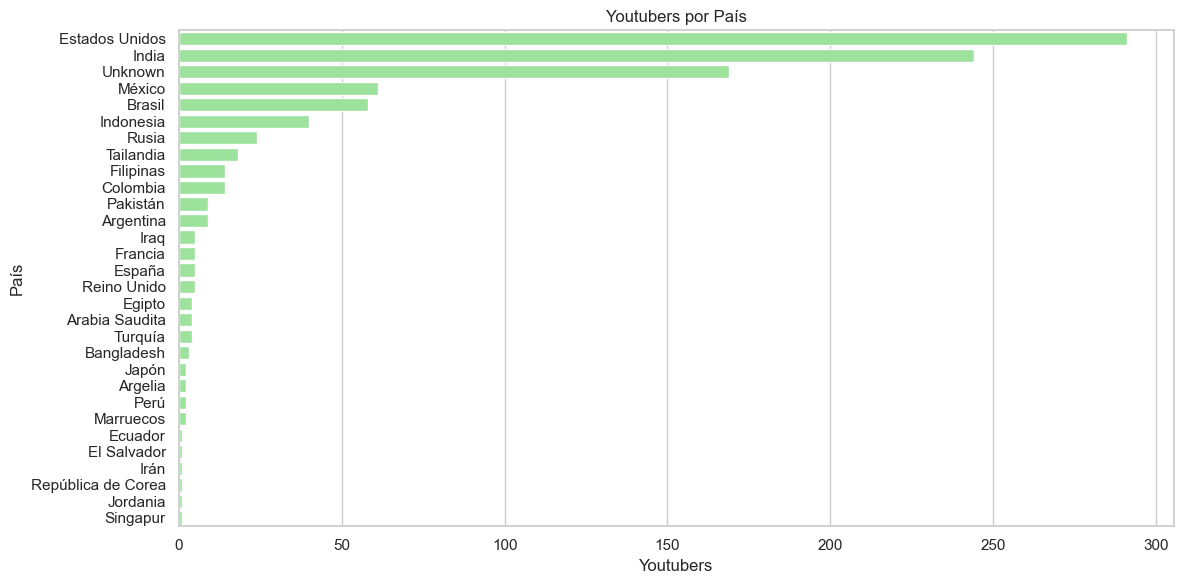

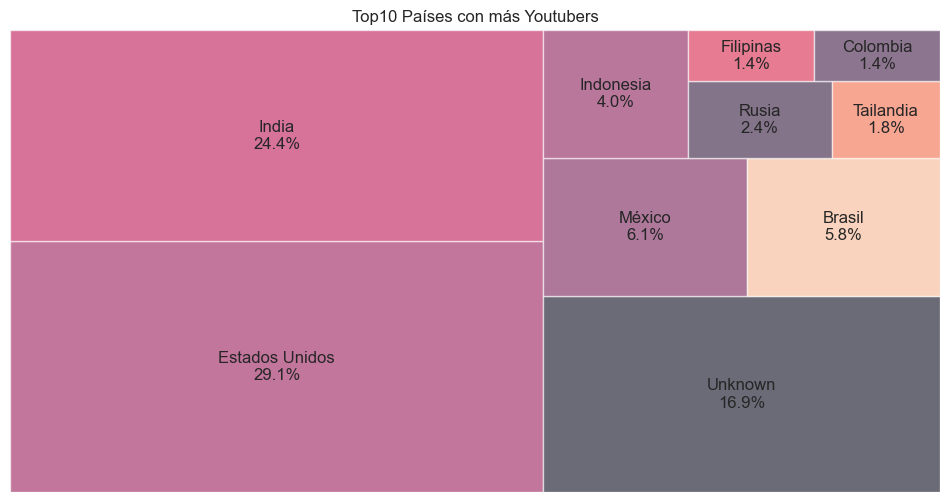

In [67]:
# Cantidad total de Youtubers por País
youtubers_country = df_clean["Country"].value_counts()

sns.barplot(x=youtubers_country.values, y=youtubers_country.index, color="lightgreen")
plt.title("Youtubers por País")
plt.xlabel("Youtubers")
plt.ylabel("País")
plt.tight_layout()
plt.show()

# Treemap del Top10
y_c_top10 = youtubers_country[:10]
labels = [f"{country}\n{viewers/10}%" for country, viewers in zip(y_c_top10.index, y_c_top10.values)]

squarify.plot(sizes=y_c_top10.values, label=labels, alpha=0.6)
plt.title("Top10 Países con más Youtubers")
plt.axis("off")
plt.show()

En este primer gráfico, podemos deducir, que el mayor éxito de Youtube se centra en creadores de contenido de EEUU e India (53.5%), seguido de los youtubers cuyo origen desconocemos (Unknown, 16.9%), y el tercer país identificado sería México (6.1%).

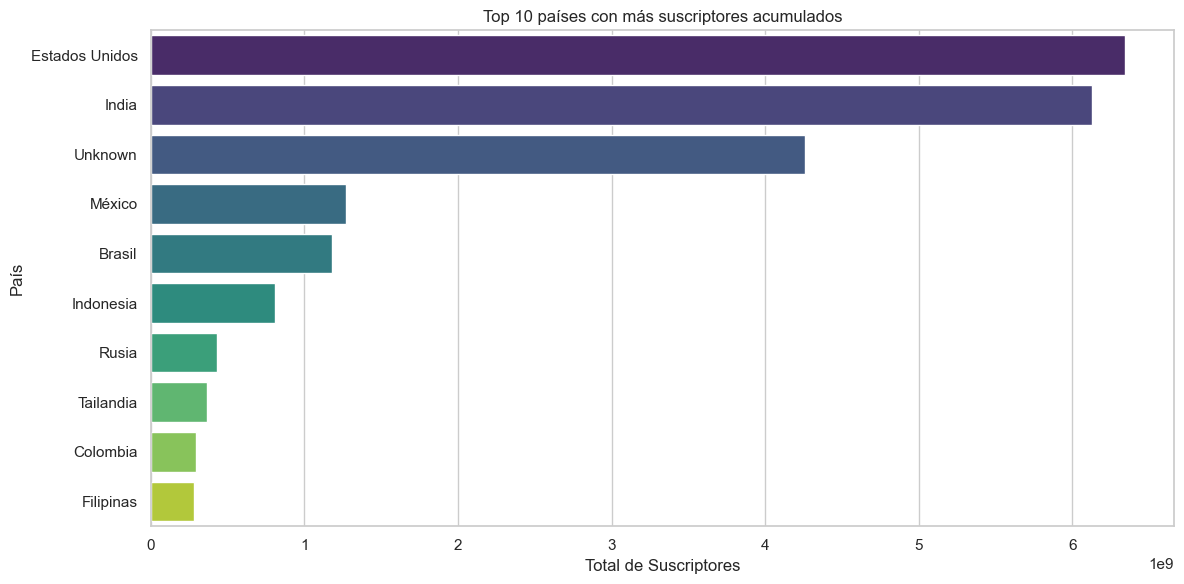

In [52]:
# Top10 países con más suscriptores
top_countries = df_clean.groupby("Country")["Suscribers"].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette="viridis")
plt.title("Top 10 países con más suscriptores acumulados")
plt.xlabel("Total de Suscriptores")
plt.ylabel("País")
plt.tight_layout()
plt.show()

A primera vista podría parecer que es el mismo resultado que en anterior top10, pero si observamos con cuidado, veremos que Colombia ha adelantado a Filipinas. 
Esto se debe a que pese a tener ambos el mismo número de creadorees de contenido, los youtubers de Colombia reciben mayor respaldo.
¿Quizás debido al idioma? Eso ya sería un estudio de mayor profundidad.

De hecho, podría haber sucedido que, teniendo EEUU el mayor porcentaje de creadores de contenido dentro del top1000 mundial, estos fuesen los de menor cantidad de suscriptores, y los catorce youtubers de Colombia estuvieran en el top15.

Por ello, vamos con el siguiente gráfico:

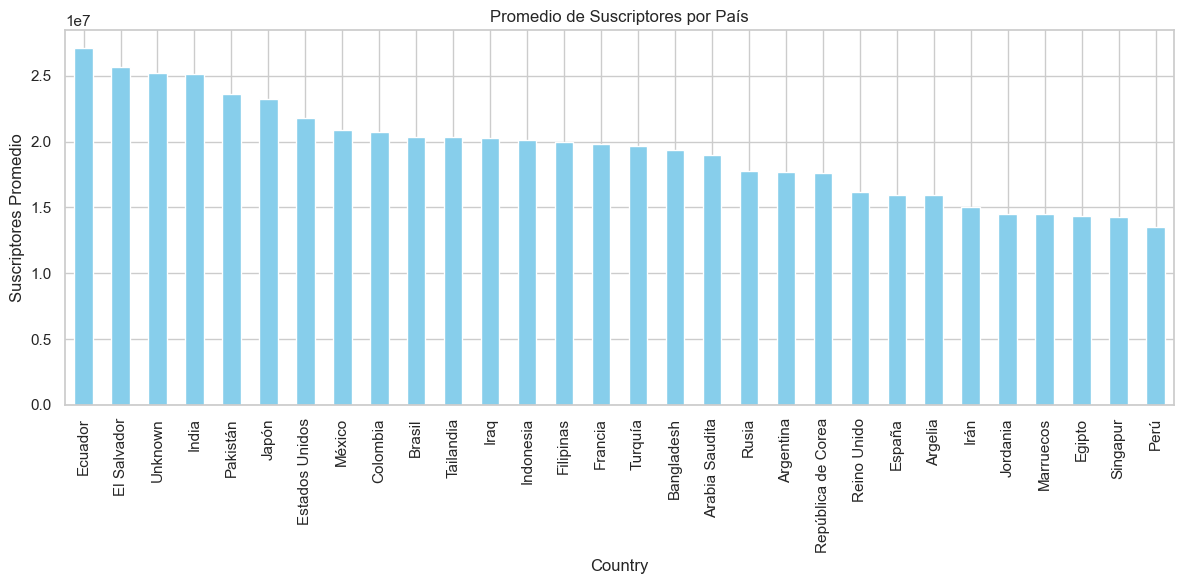

In [19]:
# Promedio de Suscriptores por País
avg_subs_country = df.groupby("Country")["Suscribers"].mean().sort_values(ascending=False)

avg_subs_country.plot(kind="bar", color="skyblue")
plt.title("Promedio de Suscriptores por País")
plt.ylabel("Suscriptores Promedio")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Vemos que lo planteado anteriormente está cerca de cumplirse, ya que EEUU y Colombia están muy cerca el uno del otro, respecto al promedio de suscriptores por canal.  
India por otro lado, ha adelantado a EEUU junto con otros países que no veíamos en el anterior gráfico.

---

Continuamos con los tops relacionados con, o basados en, las Categorías. Al haber limpiado el dataset, contamos con un total de 25 categorías (entre ellos el Unknown):  
- Cantidad total de youtubers por categoría.  
- Suscriptores por categoría y su promedio (este no será top10).  
- Visitas totales por categoría.  
- Likes por categoría.

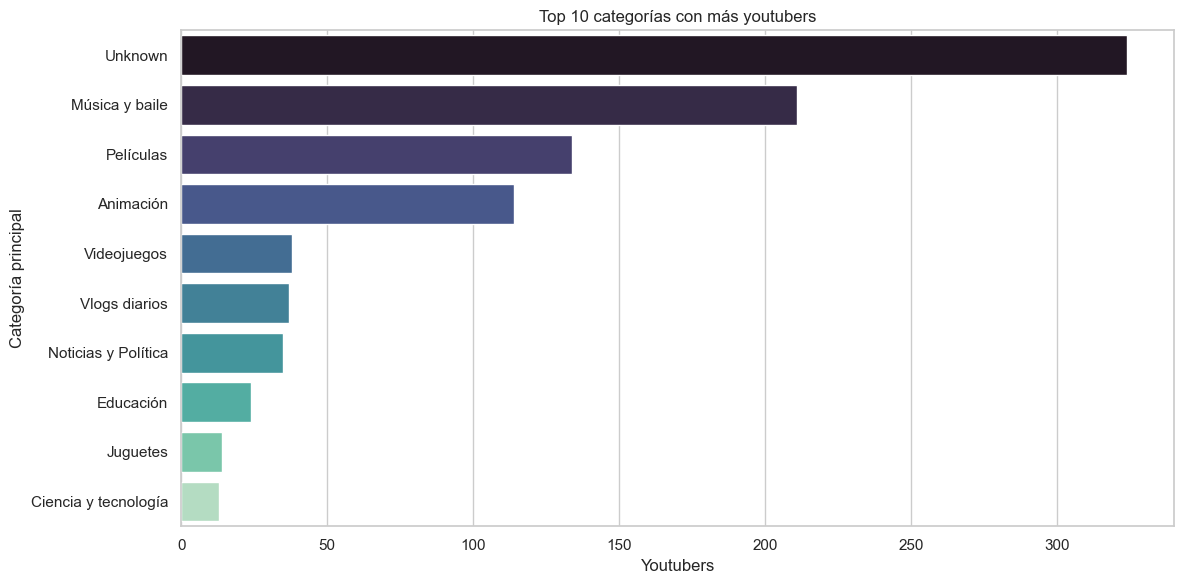

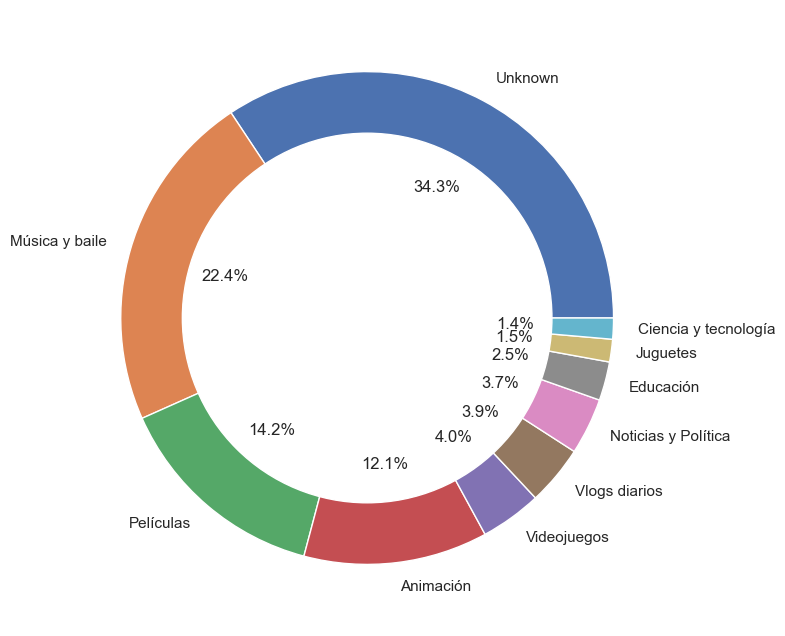

In [73]:
# Top10 categorías con más youtubers
top_categories = df_clean["MainCategory"].value_counts().head(10)

sns.barplot(x=top_categories.values, y=top_categories.index, hue=top_categories.index, palette="mako")
plt.title("Top 10 categorías con más youtubers")
plt.xlabel("Youtubers")
plt.ylabel("Categoría principal")
plt.tight_layout()
plt.show()

# Donut chart 
my_circle=plt.Circle( (0,0),
                     0.75, 
                     color="white")
plt.figure(figsize=(8,8))
plt.pie(top_categories.values,
        labels=top_categories.index,
        autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)

Tal y como vimos en el análisis previo, 324 youtubers no tienen una categoría predefinida para el contenido que crean. Por ello "Unknown" nos aparece como la categoría más popular (34.3%).
Seguido por Música y baile (22.4%), Películas (14.2%) y Animación (12.1%), podemos intuir que youtube (igual que hace 15 años) sigue siendo una plataforma idónea para acceder a contenido relacionado con las artes; la musica y la danza la cuarta y quinta, y el mundo del cine la séptima. 

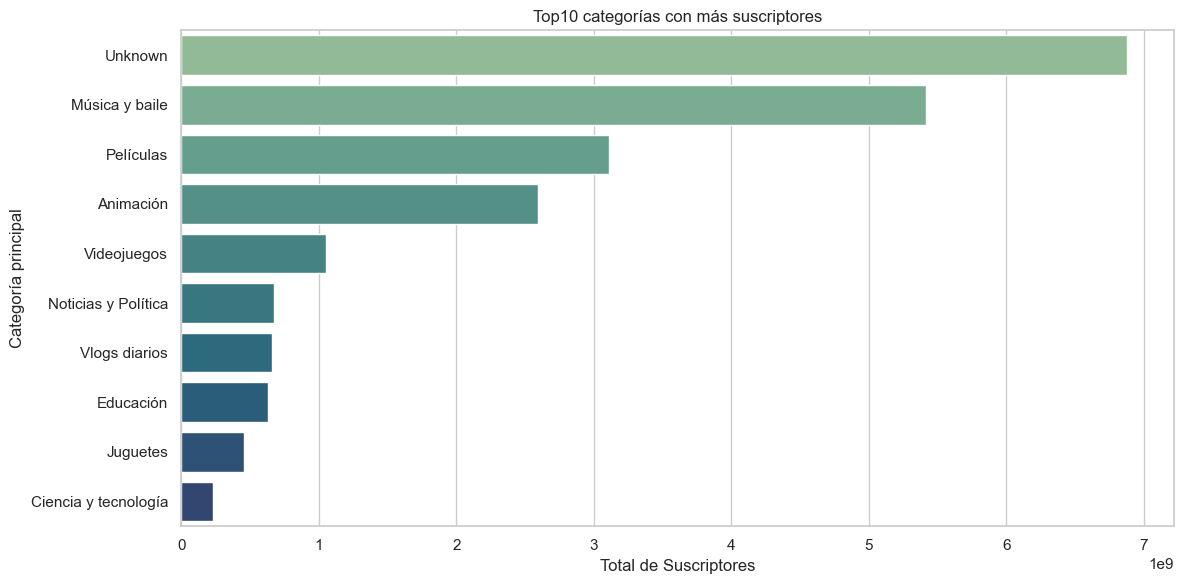

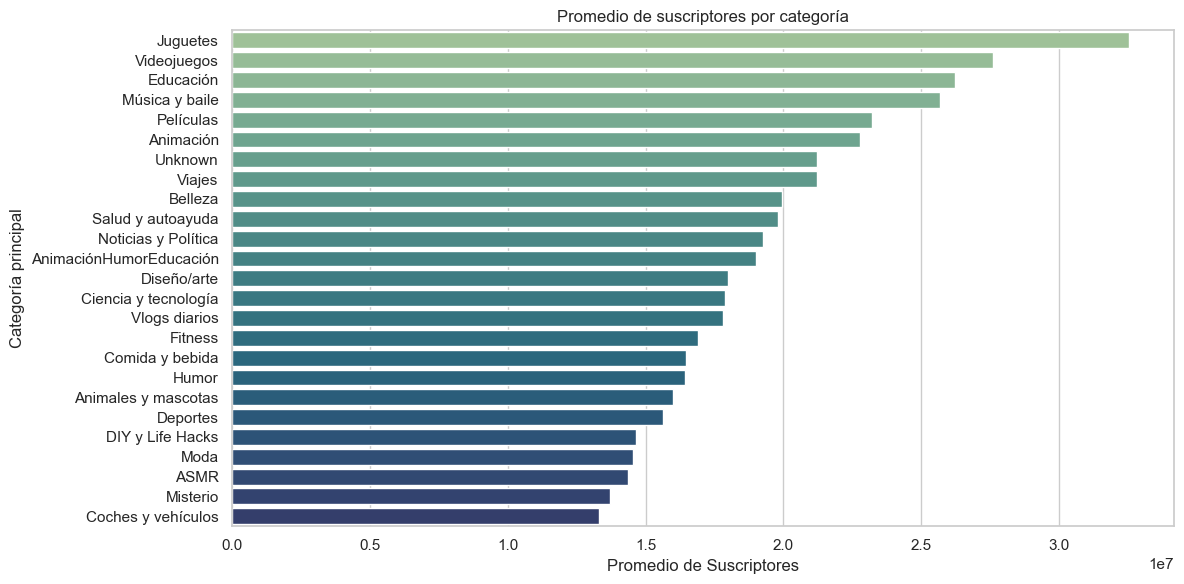

In [90]:
# Top10 Categorías con más suscriptores
subs_by_cat = df_clean.groupby("MainCategory")["Suscribers"].sum().sort_values(ascending=False)[:10]

sns.barplot(x=subs_by_cat.values, y=subs_by_cat.index, hue=subs_by_cat.index, palette="crest")
plt.title("Top10 categorías con más suscriptores")
plt.xlabel("Total de Suscriptores")
plt.ylabel("Categoría principal")
plt.tight_layout()
plt.show()

# Promedio Suscriptores por Categoría
avg_subs_by_cat = df_clean.groupby("MainCategory")["Suscribers"].mean().sort_values(ascending=False)

sns.barplot(x=avg_subs_by_cat.values, y=avg_subs_by_cat.index, hue=avg_subs_by_cat.index, palette="crest")
plt.title("Promedio de suscriptores por categoría")
plt.xlabel("Promedio de Suscriptores")
plt.ylabel("Categoría principal")
plt.tight_layout()
plt.show()

Al anamlizar las categorías, vemos algo similar a lo que pasaba al analizar los países, y es que apenas varía el ranking al mirar la cantidad de youtubers y la de suscriptores.  
Sin embargo, al analizar el promedio, vemos cambios significativos tal y como pasaba al analizar los países.

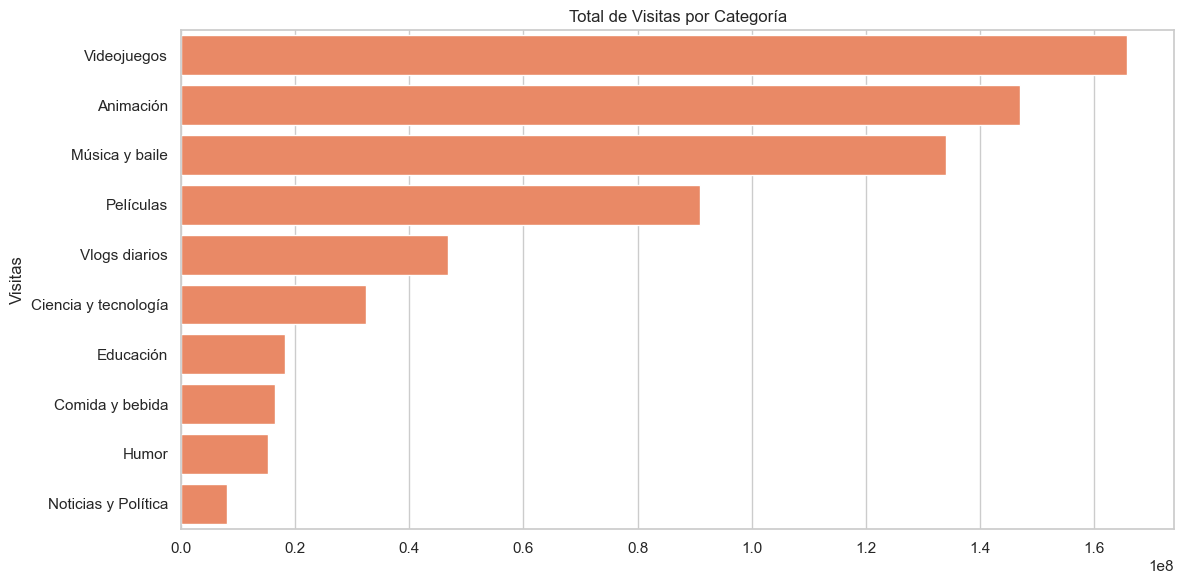

In [79]:
# Total de Visitas por Categoría
total_views_category = df_clean.groupby("MainCategory")["Visits"].sum().sort_values(ascending=False).head(11)
t_v_c_no_unknown = total_views_category[1:] # Unknown duplica a la segunda categoría y ensucia el gráfico, nos libramos de ello

sns.barplot(x=t_v_c_no_unknown.values, y=t_v_c_no_unknown.index, color="coral")
plt.title("Total de Visitas por Categoría")
plt.ylabel("Visitas")
plt.tight_layout()
plt.show()

Si bien antes veíamos cómo la categoría Videojuegos tiene un 4% de los creadores de contenido del dataset, parece ser que dichos vídeos son lo más visitado en la plataforma.

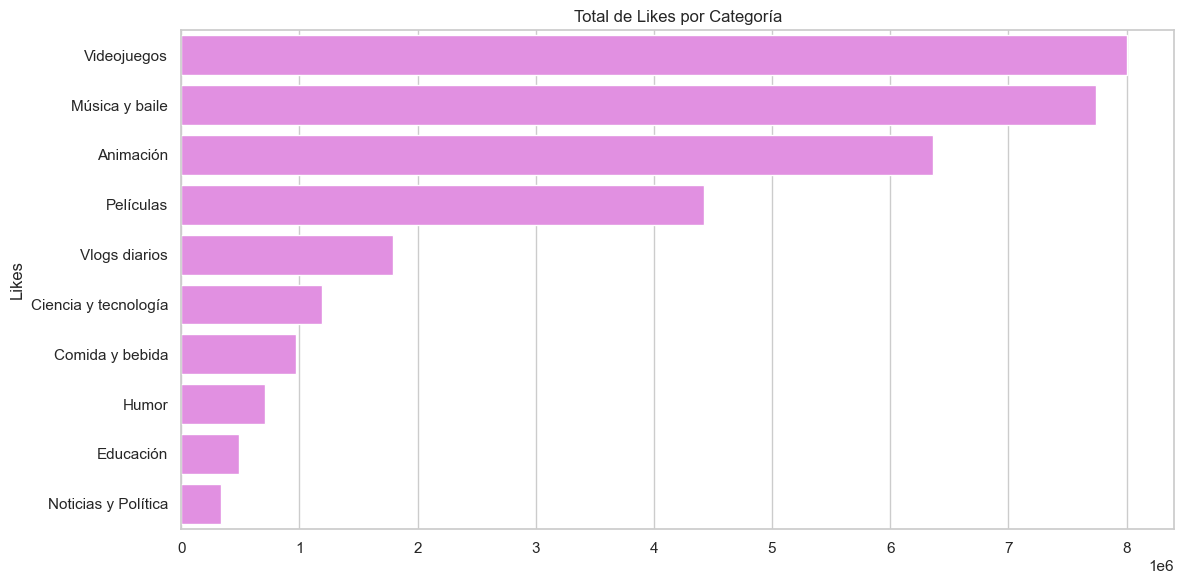

In [80]:
# Total de Likes por Categoría
total_likes_category = df_clean.groupby("MainCategory")["Likes"].sum().sort_values(ascending=False).head(11)
t_l_c_no_unknown = total_likes_category[1:] # Unknown duplica a la segunda categoría y ensucia el gráfico, nos libramos de ello

sns.barplot(x=t_l_c_no_unknown.values, y=t_l_c_no_unknown.index, color="violet")
plt.title("Total de Likes por Categoría")
plt.ylabel("Likes")
plt.tight_layout()
plt.show()

Al igual que con las visitas, vemos que los Videojuegos son la categoría que más Likes recibe en Youtube, derrocando así a la Música y Baile.

Tras estos gráficos podemos deducir, que por muchos suscriptores que se tengan los creadores de contenido de ciertas categorías, eso no te asegura que vayan a ver tus videos (pese a tener acceso rápido) ni dar al botón de Like.

### 🔄 4. Correlaciones

Vamos con las relaciones entre las columnas con valores numéricos.
Como ya dije anteriormente, intentaremos hallar mediante un **Heatmap** inicial, algún tipo de relación entre las cifras que nos otorgan las columnas de suscriptores, visitas, likes y comentarios.

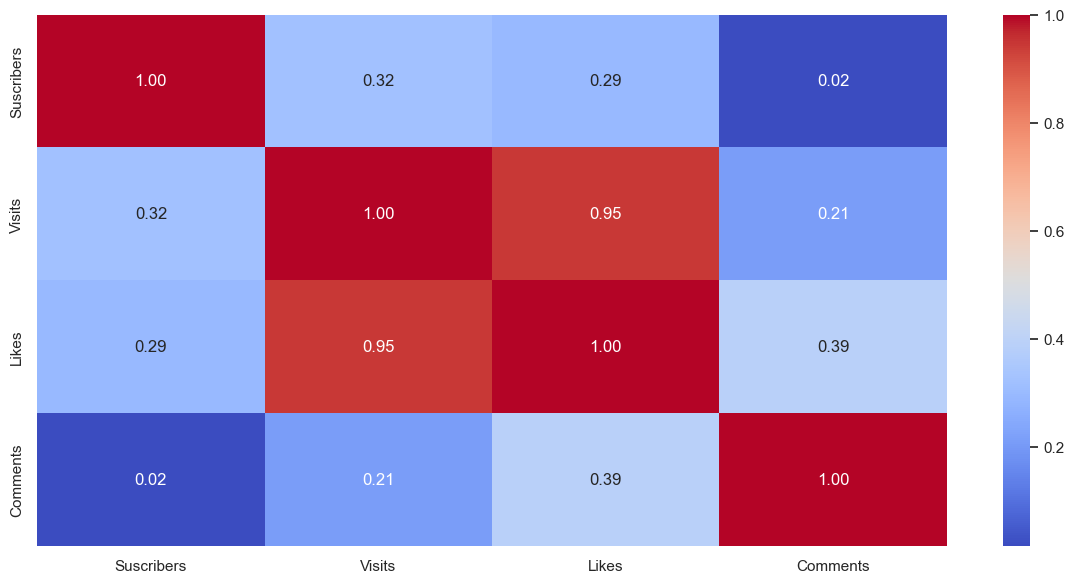

In [93]:
# Heatmap para observar posibles correlaciones a analizar (luego la top y la bottom)
corr = df_clean[["Suscribers", "Visits", "Likes", "Comments"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.tight_layout()
plt.show()

Mediante esta matriz de correlación observamos claramente que existe un vínculo entre los valores de dos columnas.
Las demás relaciones son prácticamente irrelevantes, salvo la de Likes y Comentarios aunque pudiera parecer algo dispersa, al estar muy cerca del 0.5.

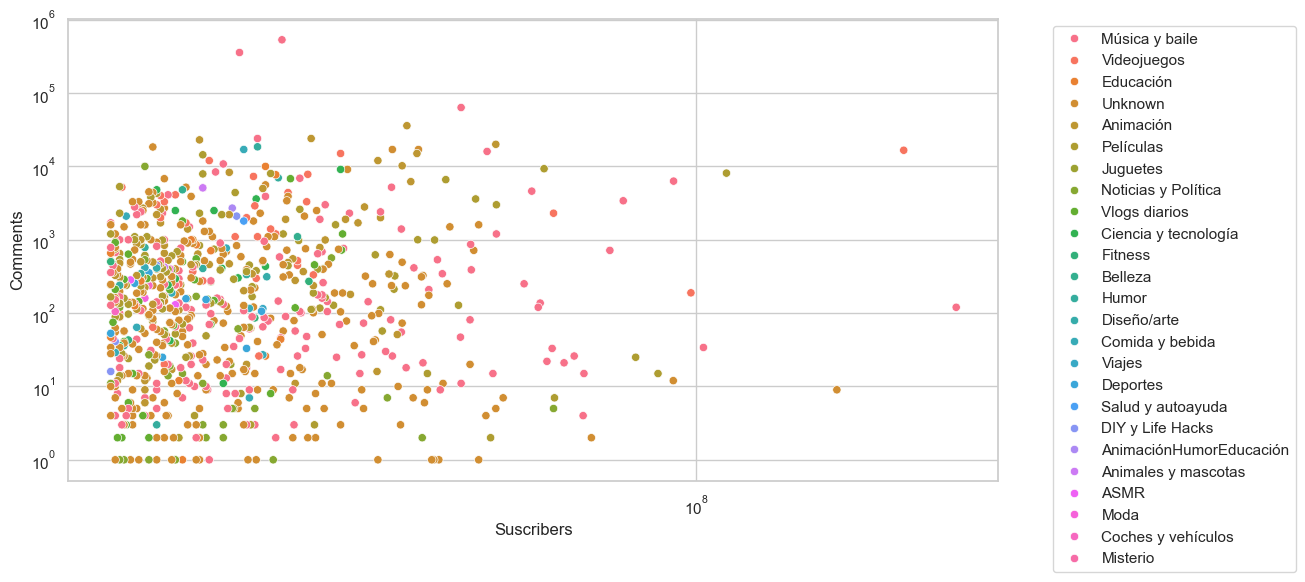

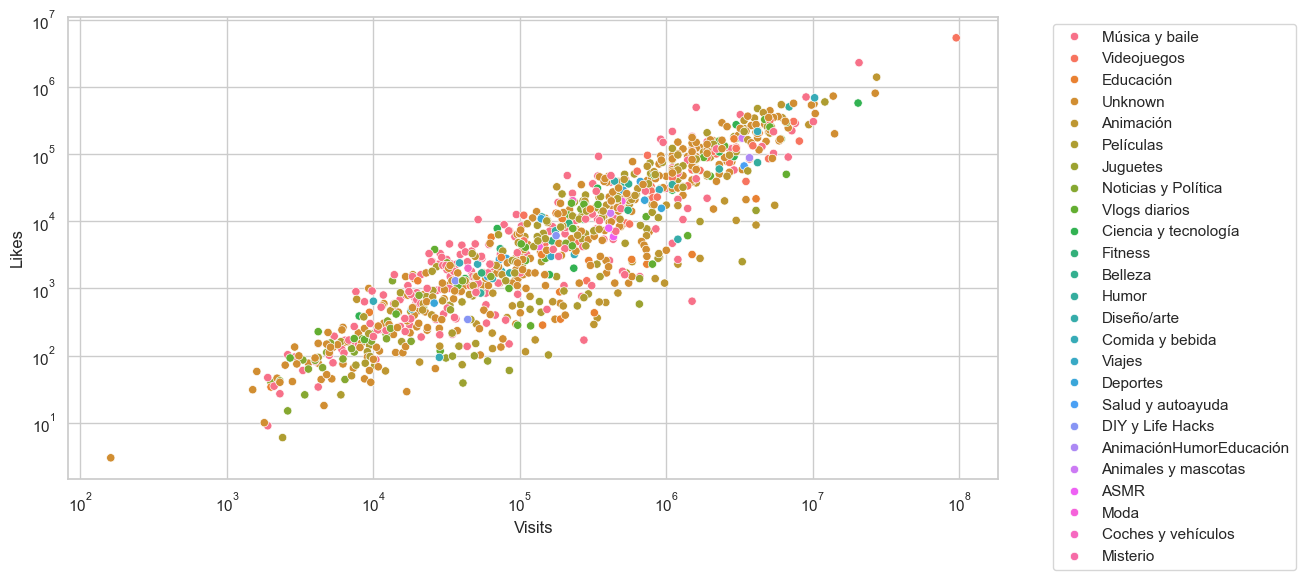

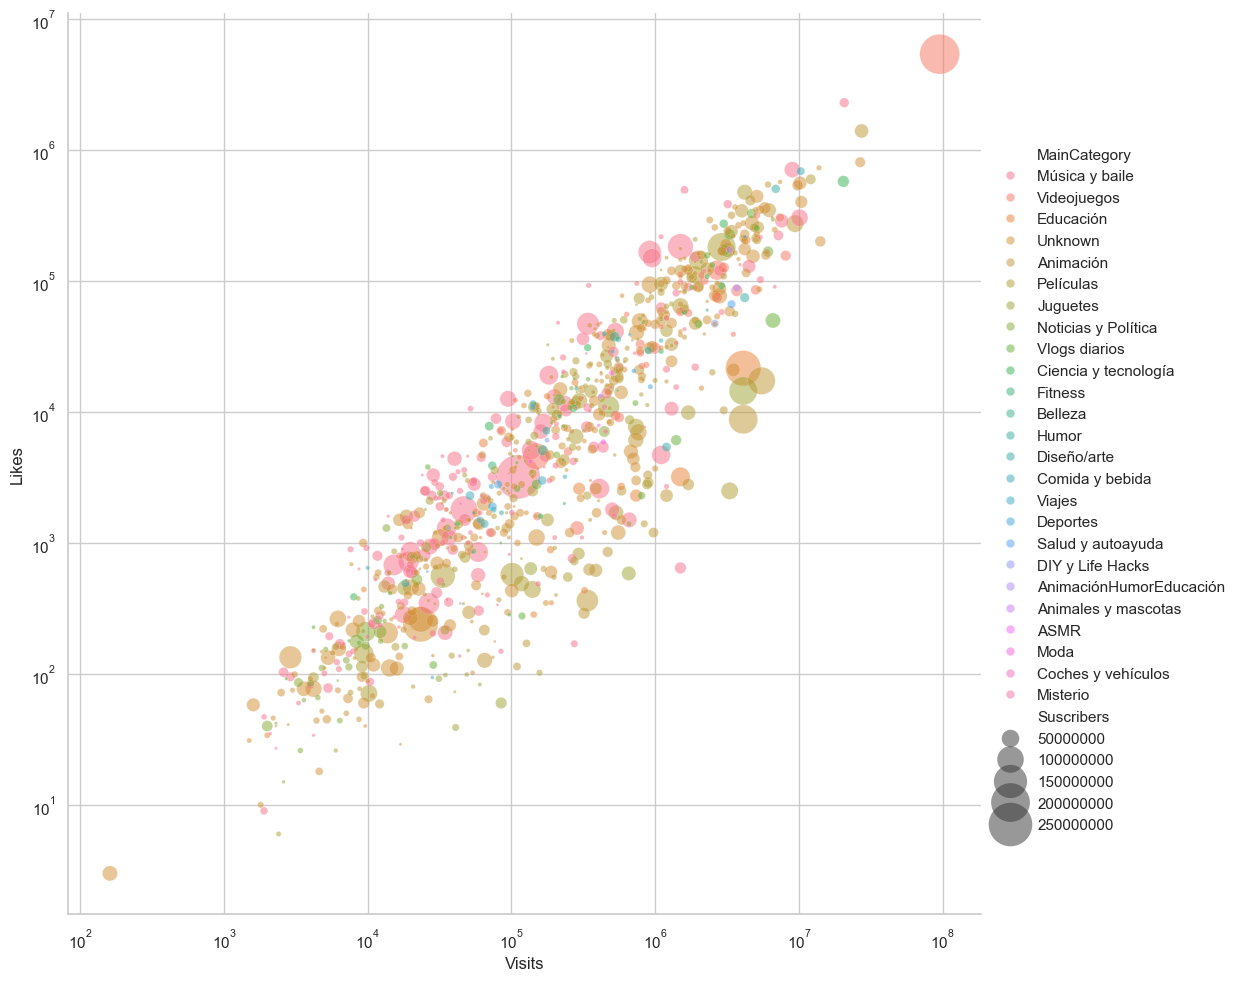

In [127]:
# Correlación entre Suscriptores y Comentarios

sns.scatterplot(data=df_clean, x="Suscribers", y="Comments", hue="MainCategory")
plt.xscale("log")
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

# Correlación entre Visitas al vídeo y Likes

sns.scatterplot(data=df_clean, x="Visits", y="Likes", hue="MainCategory")
plt.xscale("log")
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

# Bubble chart visitas/likes (tamaño subs)

sns.relplot(data=df_clean,
            x="Visits",
            y="Likes",
            hue="MainCategory", size="Suscribers",
            sizes=(4, 1000),
            alpha=.5,
            height=10)
plt.xscale("log")
plt.yscale("log")
plt.show()

Como pudimos observar mediante la matriz de correlación, las Visitas y los Likes están correlacionados de fomra positiva, mientras que no parece existir correlación alguna entre Comentarios y Suscriptores.  
Además, tampoco parece ser relevante al cantidad de suscriptores dentro de la correlación de Likes y Visitas.

### ✅ 5. Conclusiones del EDA

Por lo visto durante el análisis, podemos sacar en claro que el ranking que muestra el dataset de [este enlace](https://www.kaggle.com/datasets/computingvictor/top1000youtubers), no realiza una evaluación justa de sus creadores de contenido, ya que el número de suscriptores no garantiza mayor cantidad de visualizaciones, ni interacciones con el vídeo (Likes o Comentarios).
Es decir, que los creadores pueden haber participado en múltiples campañas de marketing o publicidad, ajenas a su habitual contenido en la plataforma para así captar atención de la audiencia no habitual de Youtube, ganando de este modo suscriptores pero sin implementar los eventos de click relacionados con sus vídeos.

Para respaldar dicha afirmación, recomiendo la lectura del siguiente [artículo](https://blog.hootsuite.com/es/algoritmo-de-youtube/), en el cual se explica el funcionamiento del **algoritmo de Youtube**, y cómo se determina la visibilidad de los videos en la plataforma. Como podremos observar, el algoritmo de Youtube tiene en cuenta factores como la interacción del usuario con el contenido, la calidad del video, la relevancia del contenido, todos ellos por encima de la cantidad de suscriptores totales acumulados.

Por lo tanto, es posible que los vídeos con contenido de alta calidad y relevancia para el usuario, sean los que obtengan mayor visibilidad en la plataforma.
Es decir, no obtenemos recomendaciones de los canales con mayor número de suscriptores, sino de los que ofrecen contenido de mayor calidad y relevancia para el usuario, en base a sus interacciones previas y a las de otros usuarios con interacciones similares.